In [ ]:
#importation des libreries nécéssaires pour le prétraitement et la con struction du modele
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt

In [ ]:
#Lien pour les données
train_path= '../datta/train'
validation_path= '../data/validation'
test_path= '../data/test'

In [ ]:
#Initialisation pour l'augmentation des données
train_gen=ImageDataGenerator(rescale=1./255)
val_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
# Créer des générateurs de données à partir de répertoires.
# target_size : Redimensionne toutes les images à 128 x 128 pixels.
# batch_size : Nombre d'images à générer par lot à partir du générateur.
# class_mode : 'binary' pour la classification binaire (chiens vs. chats).
tr_dset=train_gen.flow_from_directory(train_path, target_size=(128,128), batch_size=32, class_mode='binary')
val_dset=val_gen.flow_from_directory(validation_path, target_size=(128,128), batch_size=32, class_mode='binary')
ts_dset=test_gen.flow_from_directory(test_path, target_size=(128,128), batch_size=32, class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
#Construction du modèle convolutionnel
model=Sequential([
    Conv2D(32, (3,3),  activation='relu', input_shape=(128 , 128, 3)),
    MaxPool2D(2 , 2),
    Conv2D(24, (3 , 3 ), activation='relu'),
    MaxPool2D(2 , 2),
    Conv2D(128, (3 , 3), activation='relu'),
    MaxPool2D(2 , 2),
    Flatten(),
    Dropout(0.8),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
#compilation du modèle
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Entraîner le modèle.
# tr_dset : Générateur de données d'entraînement.
# validation_data : Générateur de données de validation pour évaluer les performances sur des données invisibles pendant l'entraînement.
# epochs : Nombre d'itérations sur l'ensemble des données d'entraînement.
history = model.fit(tr_dset, validation_data=val_dset, epochs=12)

Epoch 1/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 941ms/step - accuracy: 0.5277 - loss: 0.7170 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 2/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 813ms/step - accuracy: 0.4896 - loss: 0.6910 - val_accuracy: 0.5033 - val_loss: 0.6829
Epoch 3/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 857ms/step - accuracy: 0.5810 - loss: 0.6810 - val_accuracy: 0.5433 - val_loss: 0.7025
Epoch 4/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 855ms/step - accuracy: 0.5935 - loss: 0.6626 - val_accuracy: 0.5667 - val_loss: 0.6583
Epoch 5/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 844ms/step - accuracy: 0.6349 - loss: 0.6239 - val_accuracy: 0.5700 - val_loss: 0.6689
Epoch 6/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 803ms/step - accuracy: 0.6530 - loss: 0.6152 - val_accuracy: 0.6200 - val_loss: 0.6396
Epoch 7/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 878ms/step - accuracy: 0.7034 - loss: 0.5611 - val_accuracy: 0.6233 - val_loss: 0.6216
Epoch 8/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 849ms/step - accuracy: 0.7091 - loss: 0.5453 - val_accu

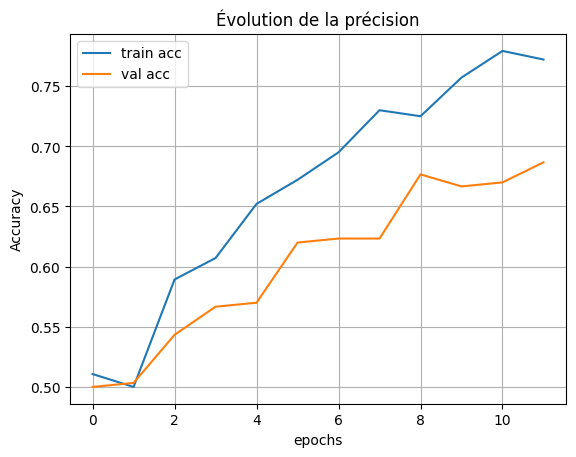

In [ ]:
# Plot training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Évolution de la précision")
plt.grid(True)
plt.show()


In [ ]:
#evaluation du modèle
model.evaluate(ts_dset)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.6828 - loss: 0.6439


[0.6330087780952454, 0.6833333373069763]